In [1]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools

In [2]:
# Reading the dataset

df = pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")

In [3]:
##Data exploration
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
df.shape

(16744, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [8]:
## Check for missing values

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
Rotten Tomatoes,11586,0.691949
Age,9390,0.560798
Directors,726,0.043359
Language,599,0.035774
Runtime,592,0.035356
IMDb,571,0.034102
Country,435,0.025979
Genres,275,0.016424
ID,0,0.000000
Title,0,0.000000


In [10]:
#Droppping irrelavent columns
df.drop(['Unnamed: 0', 'Type'],axis=1, inplace=True)

## Data Visualization

# 1. Number of movies present on different platform

Type: Pie chart

This type of graph represents the data in the circular graph. The slices of pie show the relative size of the data. A pie chart requires a list of categorical variables and the numerical variables.

In [11]:
netflix_movies_count = len(df[df['Netflix'] ==1].index)
hulu_movies_count = len(df[df['Hulu']==1].index)
prime_movies_count = len(df[df['Prime Video']==1].index)
disney_movies_count = len(df[df['Disney+']==1].index)

In [12]:
label = ['Netflix','Hulu','Prime Video','Disney+']
count = [netflix_movies_count,hulu_movies_count,prime_movies_count,disney_movies_count]
platform = pd.DataFrame({
    'Platform': label,
    'MovieCount': count,
})

In [13]:
fig = px.pie(platform, names= 'Platform', values='MovieCount',height=500,width=500)
fig.update_traces(rotation=5,pull=[0.1,0.03,0.03,0.03,0.03],textinfo='percent+label', title='Movie Count per platform')
fig.show()

##Inference:

• More than 70% of the content was observed to be on prime.

• Netflix was observed to have 20.5% contents, standing second.

• Hulu follows with the percentage of 5.2.

• The least amount of contents was found on Disney+ , which is less than 4%.

# 2. Total Number of movies released each year.
Type: Line chart

Line graphs are used to track changes over short and long periods of time. A line chart uses points connected by line segments from left to right to demonstrate changes in value.

In [14]:
yearly_movie_count = df.groupby('Year')['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})

In [15]:
fig = px.line(yearly_movie_count, x = 'Year', y='MovieCount', width=600, height=300, template = "plotly_dark")
fig.show()

##Inference:

• Data ranges from the year 1902 to 2020

• More number of movies were released in the year 2017, which is a total of 1401 movies.

• From the year 1995, a significant raise in the number of movies released was observed.


#3. Genres which have a greater number of movies.
Type: Bar chart / Column chart – vertical

Bar chart represents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A vertical bar chart is sometimes called a column chart.

In [16]:
Genre_count = df.groupby('Genres')['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
a=Genre_count.sort_values(by='MovieCount', ascending=False).head(20)
b=a.sort_values(by='Genres', ascending=False).head(20)

In [17]:
fig = px.bar(b, x="Genres", y="MovieCount",color='MovieCount',
             width=600, height=500, 
             title='Genres which have a greater number of movies.',
             template="plotly_dark")
fig.show()

##Inference:

• The genre “drama” was observed to have the most number of movies which is a total of 1314.

• The genre of” documentary” was found to have the second most number of movies.

• Following Documentary, the comedy and horror genres were found to have the highest numbers.

#4. Average IMDb rating of top 5 genres
Type: Bar chart with animation frame.

To visualize large number of data animation frame was used

In [18]:
top_5_genres = ['Drama','Documentary','Comedy', 'Comedy,Drama','Horror']
table = df.loc[:,['Year','Genres','IMDb']]
table['AvgRating'] = table.groupby([table.Genres,table.Year])['IMDb'].transform('mean')
table.drop('IMDb', axis=1, inplace=True)
table = table[(table.Year>1995) & (table.Year<2020)]
table = table.loc[table['Genres'].isin(top_5_genres)]
table = table.sort_values('Year')

In [19]:
fig=px.bar(table,x='Genres', y='AvgRating', animation_frame='Year', 
           animation_group='Genres', color='Genres',height=500,width=700, hover_name='Genres', range_y=[0,10])
fig.update_layout(showlegend=False)
fig.show()

##Inference:

• The top 5 genres were observed to be drama, comedy, comedy+drama, horror and documentary.

• Average rating for each genre can be seen with respect to the year in the animation presented above.

#5. Average rating in different countries
##CREATING A NEW DATA SET WITH COUNTRY CODE

In [20]:
df['Country'] = df['Country'].str.split(',')

df = (df
 .set_index(['ID','Title','Year','Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
             'Prime Video', 'Disney+','Directors' ,'Genres','Language', 'Runtime'])['Country']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_14', axis=1)
 .rename(columns={0:'Country'}))

In [22]:
!pip install pycountry
import pycountry
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_3
    except:
        return np.nan
df["country_code"] = df["Country"].apply(lambda country: do_fuzzy_search(country))

     |████████████████████████████████| 10.1MB 368kB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=69c7fcf1b0e27a88129a672216ea57a21528c21b2c74bce44e1bf4441b3be3f7
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [24]:
df.to_csv('new.csv')

##Type: Choropleth map

Choropleth map is a thematic map where geographic regions are coloured, shaded, or patterned in relation to a value. This type of map is particularly useful when visualizing a variable and how it changes across defined regions.

In [25]:
df1 = pd.read_csv("new.csv")

In [26]:
li = df1.groupby(['country_code','Country'])['IMDb'].mean().reset_index().rename(columns = {'Title':'MovieCount'})

In [27]:
fig = px.choropleth(li, locations="country_code",
                    color="IMDb", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

#6. Distribution of Runtime
##Type: Distplot

The distplot represents the univariate distribution of data i.e., data distribution of a variable against the density distribution.

In [28]:
lk=df.dropna()
import plotly.figure_factory as ff
x = lk["Runtime"]
hist_data = [x]
group_labels = ['Runtime'] # name of the dataset
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
fig = ff.create_distplot(hist_data, group_labels,colors=colors)
fig.show()

##Inference:

• The distribution of runtime was found to be normal.

• Most of the movies were found to have duration of 90 minutes.

• Duration was observed to vary from a range of 11 minutes to 259 minutes.

#10 Number of movies present in different age groups
##Type: Funnel Area

Each row of the Data Frame is represented as a stage of the funnel. Each stage is illustrated as a percentage of the total of all values.

In [29]:
age_count = df.groupby(['Age'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
ac=age_count.sort_values(by='MovieCount',ascending=False)

In [30]:
fig = px.funnel_area(names=ac['Age'],
                    values=ac['MovieCount'],
                     height=500,width=500,
                     color_discrete_sequence=px.colors.sequential.RdBu,
                     template="plotly_dark")
fig.update_traces(textinfo="percent+label", title='Movie Count per Age')
fig.show()

##Inference:

• The age group 18+ was observed to have the highest number of movies.

• The age group 7+ follows with nearly 19.9% of the movies.

• The age group 13+ and “all” was found to have nearly 17.1% and 11.5% of the movies respectively.

• The age group 16+ was observed to have the least number of movies i.e., 4.3%.

#7.Which age group movie has Average highest IMDb rating in each year

##Type: Area plot

Area Graphs are Line Graphs but with the area below the line filled in with a certain colour or texture. An area plot displays quantitative data visually.

In [31]:
b = df.groupby(['Age','Year'])['IMDb'].mean().reset_index().rename(columns = {'Title':'MovieCount'})
b1=b.sort_values(by='IMDb',ascending=True)

In [32]:
fig = px.area(b1, x="Year", y="IMDb", color="Age",
	      line_group="Age",height=400,width=700)
fig.show()

##Inference:

• The age group “ALL” had the highest average rating (i.e., 8) during the year – 1983.

• The age group “7+” had the highest average rating (i.e., 6.69) during the year – 1984

• The age group “13+” had the highest average rating (i.e., 6.15) during the year – 1994

• The age group “16+” had the highest average rating (i.e.,7.2 ) during the year – 2003

• The age group “18+” had the highest average rating (i.e., 6.004) during the year – 1981

#8.Content released on different platform over the years.¶
##Type: Multiple line plot

Multiple line graph, there are two or more lines in the graph connecting two or more sets of data points. The independent variable is listed along the horizontal, or x, axis and the quantity or value of the data is listed along the vertical, or y, axis.

In [33]:
netflix = df.groupby(['Netflix','Year'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
netflix_=netflix[netflix['Netflix']==1]


hulu = df.groupby(['Hulu','Year'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
hulu_= hulu[hulu['Hulu']==1]


prime = df.groupby(['Prime Video','Year'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
prime_=prime[prime['Prime Video']==1]
prime_

disney = df.groupby(['Disney+','Year'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
disney_=disney[disney['Disney+']==1]

In [34]:
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=netflix_['Year'], y=netflix_['MovieCount'],name='Netflix'))
fig1.add_trace(go.Scatter(x=hulu_['Year'], y=hulu_['MovieCount'],name='Hulu'))
fig1.add_trace(go.Scatter(x=prime_['Year'], y=prime_['MovieCount'],name='Prime'))
fig1.add_trace(go.Scatter(x=disney_['Year'], y=disney_['MovieCount'],name='Disney'))
fig1.show()

##Inference

Netflix: in the year 2017 , 569 movies were released

Hulu: in the year 2018, 158 movies were released

Prime Video: in the year 2013 ,811 movies were released

Disney+: in the year 2003 ,25 movies were released

#9. Streaming platforms with movies having IMDb rating >=7.5
#Type: Donut Chart

Donut Chart is a variation on a Pie chart except it has a round hole in the centre which makes it look like a donut, hence the name.

In [35]:
data_hulu = df[df['Hulu']==1]
data_netflix=df[df['Netflix']==1]
data_prime=df[df['Prime Video']==1]
data_disney=df[df['Disney+']==1]

def get_imdb_count_per_service(d):
    # This function returns the number of movies in a service having IMDb score greater than 7.5
    num_of_movies = 0
    for key,value in d.items():
        if key>=7:
            num_of_movies+=value
    return num_of_movies

imdb_prime_count = get_imdb_count_per_service(dict(data_prime['IMDb'].value_counts().sort_values(ascending=False)))
imdb_hulu_count = get_imdb_count_per_service(dict(data_hulu['IMDb'].value_counts().sort_values(ascending=False)))
imdb_disey_count = get_imdb_count_per_service(dict(data_disney['IMDb'].value_counts().sort_values(ascending=False)))
imdb_netflix_count = get_imdb_count_per_service(dict(data_netflix['IMDb'].value_counts().sort_values(ascending=False)))

imdb_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'IMDb Score' :[imdb_prime_count, imdb_hulu_count, imdb_disey_count, imdb_netflix_count] })

In [36]:
fig = px.pie(imdb_scores, values='IMDb Score', names='Streaming Service',height=450,width=500,
             color_discrete_sequence=px.colors.sequential.RdBu,hole=.5, title=" platforms with movies having IMDb rating >= 7")
fig.show()

##Inference:

• Prime video was observed to have the highest number of high rated movies.

• Disney+ was found to have the least number of high rated movies.

# PARALLEL CATEGORIES OF AGE VS PLATFORMS

In [37]:
df10 = df.groupby(['Age','Year','Netflix','Hulu','Prime Video','Disney+'])['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
fig = px.parallel_categories(df10, color="MovieCount")
fig.show()

# Movies that has the highest rating greater than 9.3

In [38]:
top_movies=df[df['IMDb']>=9][['Title','Directors']]

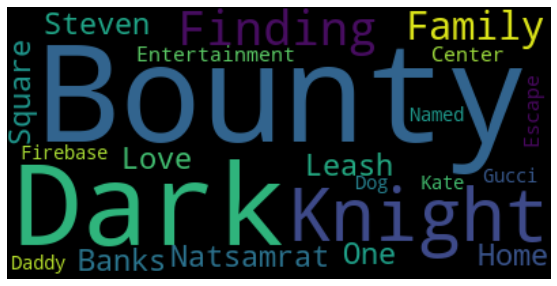

In [39]:
from wordcloud import WordCloud, ImageColorGenerator
text = ",".join(review for review in top_movies.Title)
wordcloud = WordCloud(max_words=50,collocations=False,background_color="black").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(20, 20))
plt.show()